# Phenomenological function with Multi-datasets

This example shows how to use `lmfit_global.py` to fit multi-dataset with phenomenological double exponent power-law function. 

This is an example to results published in `[Figure 1 (c)]` [Phys. Rev. B 110, 064425 (2024)](https://doi.org/10.1103/PhysRevB.110.064425) 



In [1]:
try:
    from lmfit_global import LmfitGlobal
except (ImportError, ModuleNotFoundError):
    import sys
    sys.path.append('../lmfit_global')
    from lmfit_global import LmfitGlobal
    
import matplotlib.pyplot as plt

load raw data...

(10, 4)

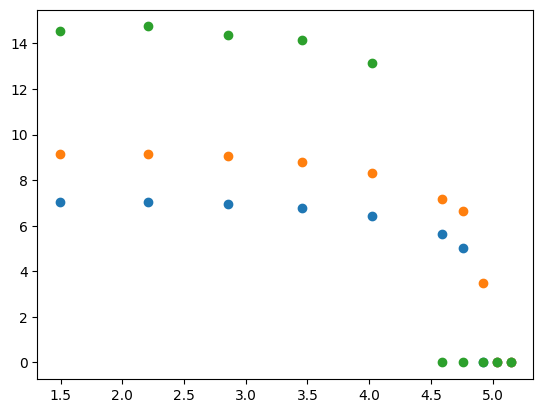

In [2]:
import os
import numpy as np
dpath = './data'  # data path

# --- Load data (skip header) ---
file='Na2PrO3_muSR_Bmu.dat' # data
file=os.path.join(
    dpath,
    file
)

dat = np.loadtxt(file, delimiter=',', skiprows=1)

# """ Columns are define as:
# 0: temp
# 1: Bmu2
# 2: Bmu2_err
# 3: Bmu1
# 4: Bmu1_err
# 5: Bmu3
# 6: Bmu3_err
# """

# --- Let extract x, y_1, y_2, y_3 and err_1, err_2, err_3 seperately

x = dat[:, 0]

cols = [0, 1, 3, 5]
xy = dat[:, cols]

xy_s = dat[:, [0, 5]]
xy_s = dat[:, [0, 1, 3]]

cols = [2, 4, 6]
xy_err = dat[:, cols]

# plot raw data
plt.figure()
# plt.plot(x, )
for i in range(1, xy.shape[1]):
    plt.plot(x, xy[:, i], 'o')    
xy.shape

built the functions... 

In [3]:
import os
import numpy as np
log2 = np.log(2)
s2pi = np.sqrt(2*np.pi)
s2 = np.sqrt(2.0)
# tiny had been numpy.finfo(numpy.float64).eps ~=2.2e16.
# here, we explicitly set it to 1.e-15 == numpy.finfo(numpy.float64).resolution
tiny = 1.0e-15

def not_zero(value):
    """Return value with a minimal absolute size of tiny, preserving the sign.

    This is a helper function to prevent ZeroDivisionError's.

    Parameters
    ----------
    value : scalar
        Value to be ensured not to be zero.

    Returns
    -------
    scalar
        Value ensured not to be zero.

    """
    return float(np.copysign(max(tiny, abs(value)), value))

def double_powerlaw(x, amplitude=1.0, center=1.0, alpha=1.0, beta=0.5):
    """Return phenomenological double exponent power-law function.
    """
    center = not_zero(center)
    r = 1.0 - (x/center)**alpha
    r = np.where(r > tiny, r, tiny)   # ensure +ve for x > center
    return amplitude * (r**beta)


def double_powerlaw(x, amplitude=1.0, center=1.0, alpha=1.0, beta=0.5):
    """Phenomenological double-exponent power-law function.

    Parameters
    ----------
    x : array_like
        Independent variable.
    amplitude : float
        Overall scaling factor.
    center : float
        Characteristic scale (must be nonzero).
    alpha : float
        First exponent controlling the (x/center) term.
    beta : float
        Second exponent applied to the residual term.

    Returns
    -------
    array_like
        Evaluated double power-law function.
    """
    # ensure center is not zero
    center = np.copysign(max(tiny, abs(center)), center)

    # residual term, clipped to avoid negatives or zero
    r = 1.0 - (x / center) ** alpha
    r = np.clip(r, tiny, None)

    return amplitude * (r ** beta)

built `data` and `function` **`item`** `dict` for `LmfitGlobal` ...

In [4]:
# data dict
data_dict = {
    'xy': xy_s,         # data_xy, i.e numpy.column_stack([x, y_0, y_1, ..., y_n])
    'xrange': None    # x range in (min, max) of the data range to fit, default is None
    }


func_lst = [
    {
        'func_name': double_powerlaw,
        'init_params' : {
            'amplitude': {'value':10.0, 'vary':True, 'min':0, 'max':20},
            'center': {'value':4.92, 'vary':True, 'min':4.9, 'max':5.0},
            'alpha': {'value':4.04, 'vary':False, 'min':3.9, 'max':6.1},
            'beta': {'value':0.2, 'vary':True, 'min':0, 'max':0.5},
        },
        'func_kws': {}   # <-- Additional keyword arguments to pass to model function `'func_name'`.
    },
]

# function dict
function_dict = {
    'theory': func_lst,
    'theory_connectors': None,  
}


# items 
items = {
    'data': data_dict,              # 1. data (see above)
    'functions': function_dict,     # 2. thoery (see above)
}

call `LmfitGlobal` ...

In [5]:
LFG = LmfitGlobal(items)

INFO: Validating data...
INFO: Validating functions...
INFO: Validating nan policy...
INFO: Creating lmfit.Models for the functions...
INFO: Initializing lmfit.Parameters for the functions...
INFO: Setting lmfit fitting/minimization protocols for the functions...
INFO: ##############################################################
INFO: # y(x;) = double_powerlaw(x, amplitude, center, alpha, beta) #
INFO: ##############################################################


print & plot initial parameter definitions...

Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
alpha_0          4.04      3.9      6.1     None    False     None     None
alpha_1          4.04      3.9      6.1     None    False     None     None
amplitude_0        10        0       20     None     True     None     None
amplitude_1        10        0       20     None     True     None     None
beta_0            0.2        0      0.5     None     True     None     None
beta_1            0.2        0      0.5     None     True     None     None
center_0         4.92      4.9        5     None     True     None     None
center_1         4.92      4.9        5     None     True     None     None


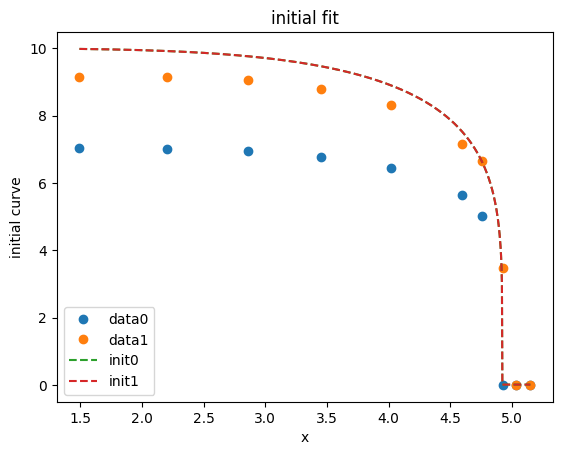

In [6]:
LFG.initial_params.pretty_print()  # pretty print initial parameters

axes0 = LFG.plot_init(numpoints=1000)  # plot init parameters

update initial parameter definitions...

INFO: Validating data...
INFO: Validating functions...
INFO: Validating nan policy...
INFO: Creating lmfit.Models for the functions...
INFO: Initializing lmfit.Parameters for the functions...
INFO: Setting lmfit fitting/minimization protocols for the functions...
INFO: ##############################################################
INFO: # y(x;) = double_powerlaw(x, amplitude, center, alpha, beta) #
INFO: ##############################################################
INFO: The parameter "alpha_0" is shared with ALL "alpha_*" parameters...
INFO: The parameter "beta_0" is shared with ALL "beta_*" parameters...
INFO: The parameter "center_0" is shared with ALL "center_*" parameters...


Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
alpha_0          4.04      3.9      6.1     None    False     None     None
alpha_1          4.04      3.9      6.1     None    False  alpha_0     None
amplitude_0        10        0       20     None     True     None     None
amplitude_1        10        0       20     None     True     None     None
beta_0            0.2        0      0.5     None     True     None     None
beta_1            0.2        0      0.5     None    False   beta_0     None
center_0         4.92      4.9        5     None     True     None     None
center_1         4.92      4.9        5     None    False center_0     None
INFO: Fitting .....

INFO: Fitting DONE...
INFO: Parameters fit values:
INFO: Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
INFO: alpha_0          4.04      3.9      6.1        0    False     None     None
INFO: alpha_1          4.04      3.9      6.1        0    False  alpha_0     None
INFO: amplitude_0     6.925        0       20   0.3759     True     None     None
INFO: amplitude_1     8.999        0       20   0.3943     True     None     None
INFO: beta_0         0.1182        0      0.5  0.06863     True     None     None
INFO: beta_1         0.1182        0      0.5  0.06863    False   beta_0     None
INFO: center_0          4.9      4.9        5   0.2213     True     None     None
INFO: center_1          4.9      4.9        5   0.2213    False center_0     None
INFO: Coefficient of determination: R² = 0.95158041 (uniform average)...
INFO: Coefficient of determination: R² = 0.94466240 (variance-weighted)...


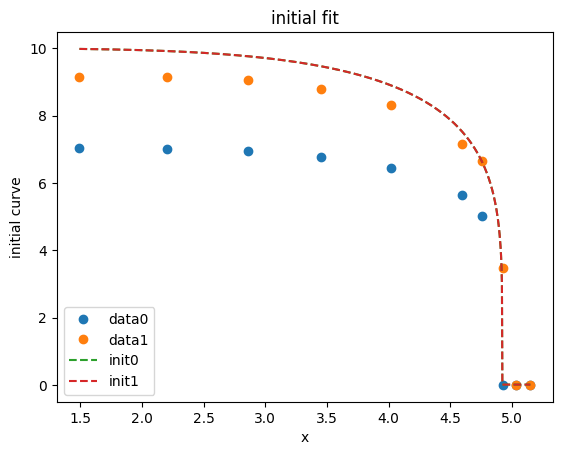

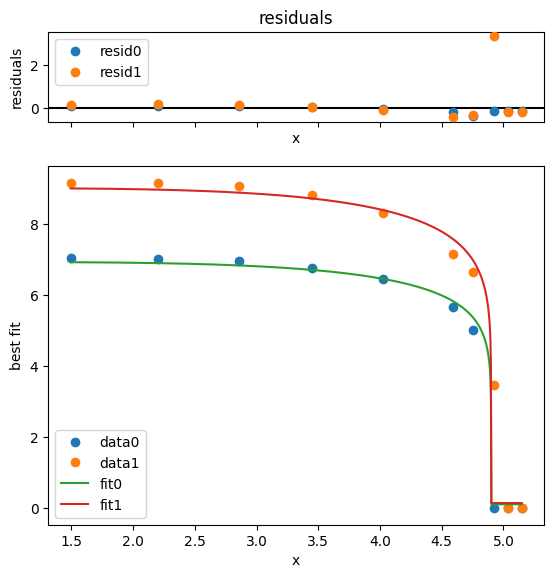

In [7]:
LFG = LmfitGlobal(items)

LFG.set_global('alpha_0')
LFG.set_global('beta_0')
LFG.set_global('center_0')

# # ERROR AS WE EXPECT MORETHAN ONE PARAMETER (NAME, VALUE, VARY, MIN, MAX, EXPR, BRUTE_STEP)
# beta_2 = ('beta_2', 0.15, False, 0, 0.5, None, None)
# LFG.update_params(beta_2)

LFG.initial_params.pretty_print()  # pretty print initial parameters

axes0 = LFG.plot_init(numpoints=1000)  # plot init parameters

LFG.fit(verbose=True)  # verbose, if True will show fit parameters

axes1 = LFG.plot(show_init=False, numpoints=1000)   # plot fit data & residuals and show initial plot (if True)

do fit...

In [8]:
LFG.fit(verbose=True)  # verbose, if True will show fit parameters

INFO: Fitting .....

INFO: Fitting DONE...
INFO: Parameters fit values:
INFO: Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
INFO: alpha_0          4.04      3.9      6.1        0    False     None     None
INFO: alpha_1          4.04      3.9      6.1        0    False  alpha_0     None
INFO: amplitude_0     6.925        0       20   0.3759     True     None     None
INFO: amplitude_1     8.999        0       20   0.3943     True     None     None
INFO: beta_0         0.1182        0      0.5  0.06863     True     None     None
INFO: beta_1         0.1182        0      0.5  0.06863    False   beta_0     None
INFO: center_0          4.9      4.9        5   0.2213     True     None     None
INFO: center_1          4.9      4.9        5   0.2213    False center_0     None
INFO: Coefficient of determination: R² = 0.95158041 (uniform average)...
INFO: Coefficient of determination: R² = 0.94466240 (variance-weighted)...


plot fit...

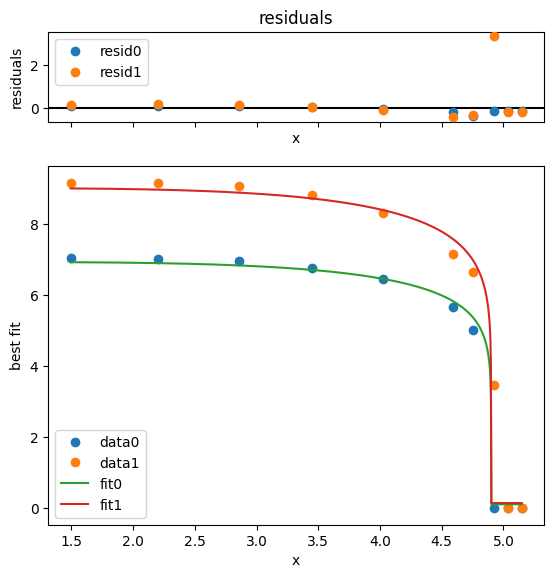

In [9]:
axes1 = LFG.plot(show_init=False, numpoints=1000)   # plot fit data & residuals and show initial plot (if True)

In [10]:
LFG.report()

[[Model]]
    Model(double_powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 490
    # data points      = 20
    # variables        = 4
    chi-square         = 11.7338758
    reduced chi-square = 0.73336724
    Akaike info crit   = -2.66504494
    Bayesian info crit = 1.31788415
    R-squared (mean)   = 0.95158041
    R-squared (weight) = 0.94466240
[[Variables]]
    amplitude_0:  6.92465707 +/- 0.37594718 (5.43%) (init = 10)
    center_0:     4.90000000 +/- 0.22131412 (4.52%) (init = 4.92)
    alpha_0:      4.04 (fixed)
    beta_0:       0.11821900 +/- 0.06863404 (58.06%) (init = 0.2)
    amplitude_1:  8.99908763 +/- 0.39429857 (4.38%) (init = 10)
    center_1:     4.90000000 +/- 0.22131412 (4.52%) == 'center_0'
    alpha_1:      4.04000000 +/- 0.00000000 (0.00%) == 'alpha_0'
    beta_1:       0.11821900 +/- 0.06863404 (58.06%) == 'beta_0'
[[Correlations]] (unreported correlations are < 0.100)
    C(center_0, beta_0)         = -0.8339
    C(beta_0

(1, 300)

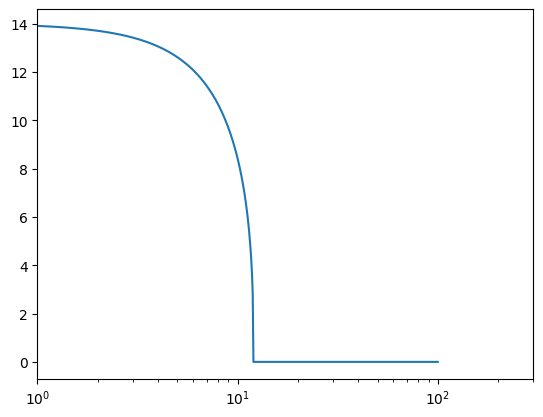

In [11]:
import numpy as np

tiny = 1e-15  # safeguard against division by zero

def double_power_law(x, amplitude=1.0, center=1.0, alpha=1.0, beta=0.5):
    """
    Phenomenological double-exponent power-law function.

    Parameters
    ----------
    x : array_like
        Independent variable.
    amplitude : float
        Overall scaling factor.
    center : float
        Characteristic scale (must be nonzero).
    alpha : float
        First exponent controlling the (x/center) term.
    beta : float
        Second exponent applied to the residual term.

    Returns
    -------
    array_like
        Evaluated double power-law function.
    """
    # ensure center is not zero
    center = np.copysign(max(tiny, abs(center)), center)

    # residual term, clipped to avoid negatives or zero
    r = 1.0 - (x / center) ** alpha
    r = np.clip(r, tiny, None)

    return amplitude * (r ** beta)


x = np.linspace(1, 100, 1000)
y = double_power_law(x, amplitude=14.0, center=12.0, alpha=1.6, beta=0.37)


plt.xscale('log')
plt.plot(x, y)
plt.xlim([1, 300])
